### Bank Marketing Campaign Analysis and Modeling

#### Dataset

This dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).
The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns. (CRISP-DM-BANK.pdf) for more information on the data and features.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.experimental import enable_halving_search_cv
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import tree
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsOneClassifier

In [2]:
# Loading the Dataset 
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

### Business Objective: What features can be used to build a more successfuly marketing campaign? 

### Exploratory Data Analysis (EDA)

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Input Variables
    1 - age (numeric)
    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: has credit in default? (categorical: 'no','yes','unknown')
    6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    7 - loan: has personal loan? (categorical: 'no','yes','unknown')
#### related with the last contact of the current campaign:
    8 - contact: contact communication type (categorical: 'cellular','telephone')
    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#### other attributes:
    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14 - previous: number of contacts performed before this campaign and for this client (numeric)
    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
#### social and economic context attributes
    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    20 - nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):
    21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [5]:
# The target is unbalanced in the dataset
count = df['y'].value_counts()
success_rate = count[1]/len(df)
print(f"yes percentage {success_rate:.2%}")

yes percentage 11.27%


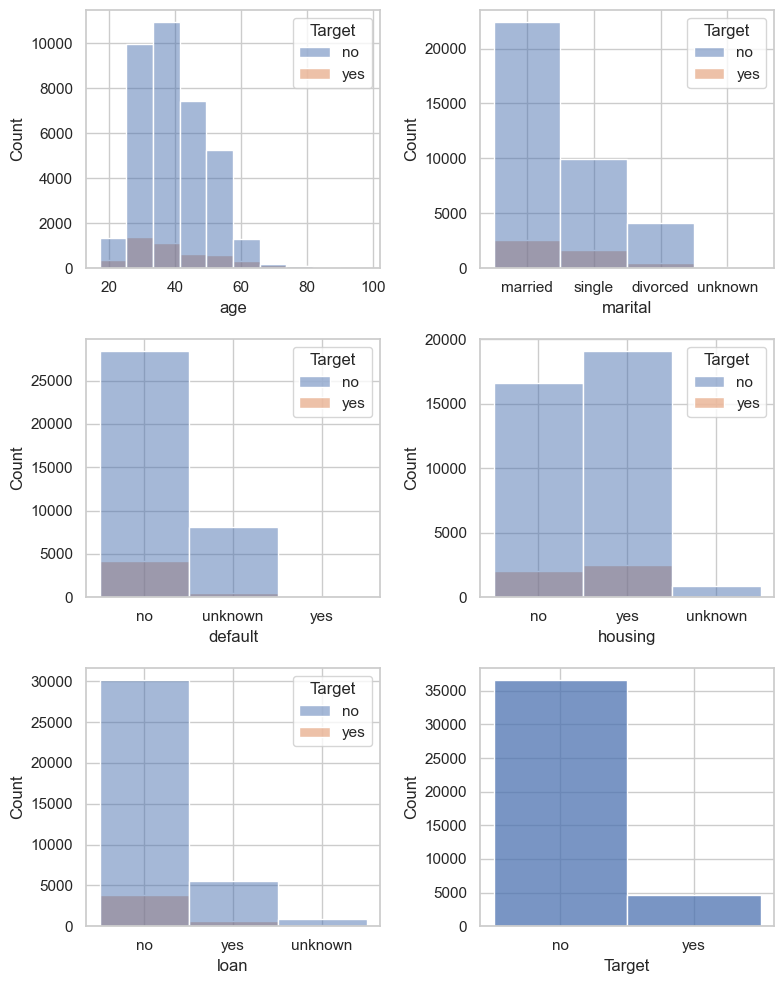

In [6]:
dfplot = df.copy()
dfplot.rename(columns={'y': 'Target'}, inplace=True)
sns.set(style="whitegrid")  
fig,axs = plt.subplots(3,2, figsize = (8,10))
sns.histplot(data=dfplot, x="age", bins=10,hue='Target', color="skyblue", ax=axs[0, 0])
sns.histplot(data=dfplot, x="marital", hue='Target', color="gold", ax=axs[0, 1])
sns.histplot(data=dfplot, x="default", hue='Target', color="teal", ax=axs[1, 0])
sns.histplot(data=dfplot, x="housing", hue='Target' ,color="blue", ax=axs[1, 1])
sns.histplot(data=dfplot, x="loan",  hue='Target',color="purple", ax=axs[2,0])
sns.histplot(data=dfplot, x="Target", ax=axs[2,1])
fig.tight_layout()

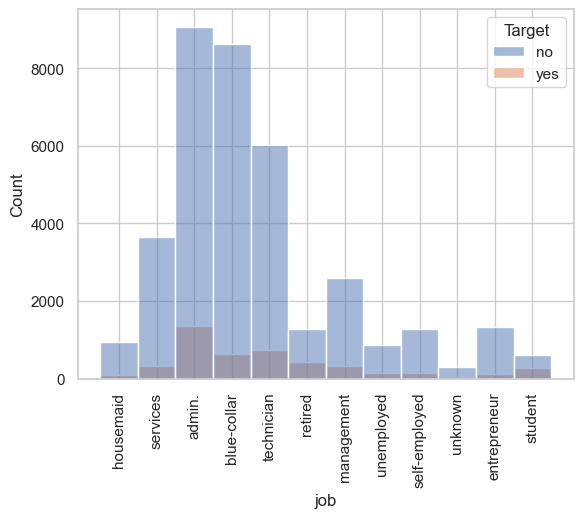

In [7]:
sns.set(style="whitegrid")  
sns.histplot(data=dfplot, x="job", hue="Target")
plt.xticks(rotation=90) 
plt.show()

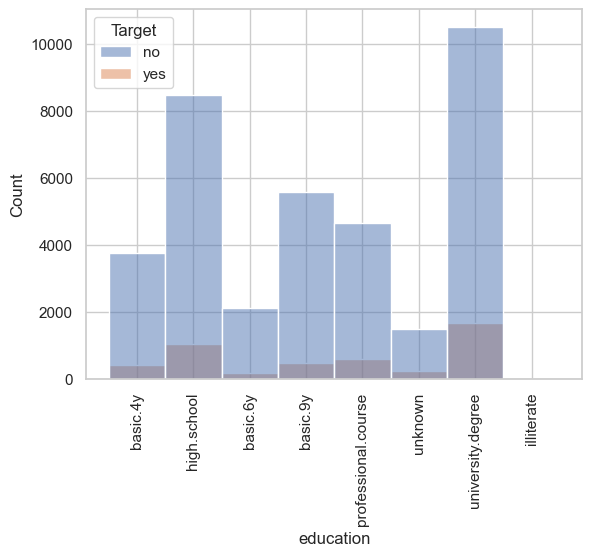

In [8]:
sns.set(style="whitegrid")  
sns.histplot(data=dfplot, x="education", hue="Target")
plt.xticks(rotation=90) 
plt.show()

### DATA CLEANING

In [9]:
# Copy 'yes' data to balance the target class
d1=df.copy()
d2=d1[d1.y=='yes']
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
df1=d1

count = df1['y'].value_counts()
print("yes percentage", (count[1]/len(df1)*100))

yes percentage 49.611771732638324


In [10]:
# Reduce number of feature catagories
df1['marital'] = df1['marital'].str.replace('unknown','single')# Assign 'marital' status "unknown" to "single"
df1['default']= df1['default'].str.replace('yes', 'unknown') # only 3 yes values, change to unknown
df1['housing'] =df1['housing'].str.replace('unknown','no')
df1['loan'] =df1['loan'].str.replace('unknown','no')

### Feature Engineering

In [11]:
#select the first 10 columns for modeling
# These features represent the pre-contact information that is available
X = df1.iloc[:, :10] 

In [12]:
# Transform binary to numberic
X['loan']=X['loan'].map(dict(yes=1,no=0))
X['default']=X['default'].map(dict(unknown=1,no=0))
X['housing']=X['housing'].map(dict(yes=1,no=0))

In [13]:
#Feature encoding
X = pd.get_dummies(X,dtype='float') # convert object columns to numeric
y= df1['y'].map(dict(yes=1, no=0))

### Split Data for Training and testing

In [14]:
#Split the data for training
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Run Baseline Model and Compare Default Classifiers

In [15]:
# Setup pipeline to test models without hyper-parameters 
pipelines = {
    'Baseline': Pipeline([('scaler', StandardScaler()), ('classifier', DummyClassifier())]),
    'LR': Pipeline([('scaler', StandardScaler()), ('classifier', LogisticRegression())]),
    'KNN': Pipeline([('scaler', StandardScaler()), ('classifier', KNeighborsClassifier())]),
    'DT': Pipeline([('scaler', StandardScaler()), ('classifier', DecisionTreeClassifier())]),
    'SVM': Pipeline([('scaler', StandardScaler()), ('classifier', SVC())])
}

In [17]:
scores_train = {}
scores_test={}
for model_name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    score_train = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy').mean()
    scores_train[model_name] = score_train
    score_test = cross_val_score(pipeline, X_test, y_test, cv=5, scoring='accuracy').mean()
    scores_test[model_name] = score_test
    print(f"{model_name} with train accuracy score {score_train:.3f}")
    print(f"{model_name} with test accuracy score {score_test:.3f}")

Baseline with train accuracy score 0.505
Baseline with test accuracy score 0.500
LR with train accuracy score 0.673
LR with test accuracy score 0.671
KNN with train accuracy score 0.820
KNN with test accuracy score 0.693
DT with train accuracy score 0.911
DT with test accuracy score 0.797
SVM with train accuracy score 0.733
SVM with test accuracy score 0.706


### Utilize Best Models and Tune Hyperparameters
### Decision Tree Classifier & Logistic Regression

In [18]:
params = {'max_depth': range(10,44,2),
         'min_samples_split': [3,5,7],
          'min_samples_leaf': [2,3,5]
         }
clf = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv = 5)
clf.fit(X_train, y_train)

grid_score = clf.best_score_
mean_fit_time= clf.cv_results_['mean_fit_time']
mean_score_time= clf.cv_results_['mean_score_time']
n_splits  = clf.n_splits_ #number of splits of training data
n_iter = pd.DataFrame(clf.cv_results_).shape[0] #Iterations per split
grid_time = np.mean(mean_fit_time + mean_score_time) * n_splits * n_iter
grid_est = clf.best_estimator_
grid_params = clf.best_params_

print('Best score: ', grid_score)
print("search time (sec):", grid_time)
print("Best Estimator: ", grid_est)
print("Best Paramaters: ", grid_params)

Best score:  0.8825903972163613
search time (sec): 126.20178127288817
Best Estimator:  DecisionTreeClassifier(max_depth=38, min_samples_leaf=2, min_samples_split=3)
Best Paramaters:  {'max_depth': 38, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [19]:
# Decision Tree Classifier with tuned parameters
dtree=DecisionTreeClassifier(max_depth = 40, min_samples_split =2 ,min_samples_leaf=3)
dt_pipe = Pipeline([('scaler', StandardScaler()), ('classifier', DecisionTreeClassifier())])
dt_pipe.fit(X_train,y_train)
dt_preds = dt_pipe.predict(X_test)
dt_score = accuracy_score(y_test,dt_preds)
print(f"Test Accuracy score: {dt_score:.3}")

Test Accuracy score: 0.925


### Use Logistic Regression to Identify Important Features

In [20]:
# Logistic Regression Classifier
c= [.001,.01,.05,.1,.5]
for i in c:
    lr = LogisticRegression(C=i,multi_class='ovr',max_iter=1000).fit(X, y)
    lr_preds = lr.predict(X_test)
    lr_score = accuracy_score(y_test,lr_preds)
    print(f"C = {i} Test accuracy score {lr_score:.3f}")
#Use C=.1 to provide regularization without affecting accuracy. 

C = 0.001 Test accuracy score 0.657
C = 0.01 Test accuracy score 0.671
C = 0.05 Test accuracy score 0.673
C = 0.1 Test accuracy score 0.674
C = 0.5 Test accuracy score 0.674


In [21]:
# Select Regularized LR model and examine coeffecients to determin important features
lr_pipe = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression(C=0.1,multi_class='ovr',max_iter=1000))])
lr_pipe.fit(X_train,y_train)
lr_preds = lr_pipe.predict(X_test)
lr_coefs = lr_pipe.named_steps['model'].coef_
lr_features = X_train.columns
lr_results=pd.DataFrame({'Features':lr_features.ravel(), 'Coeffs': lr_coefs.ravel()}).set_index('Features')
lr_results = lr_results.sort_values(by = 'Coeffs', ascending = False)

### Analysis of Important Features

In [22]:
print("Most Important Features for Positive Result")
print(lr_results.head(10))

Most Important Features for Positive Result
                    Coeffs
Features                  
month_mar         0.308039
month_oct         0.294352
month_sep         0.242988
contact_cellular  0.242427
job_student       0.194474
month_dec         0.161941
job_retired       0.157015
month_jun         0.102523
age               0.101985
month_apr         0.091978


In [23]:
print("Most Important Features Leading to Negative Result")
print(lr_results.tail(10))

Most Important Features Leading to Negative Result
                     Coeffs
Features                   
job_services      -0.050784
job_technician    -0.052974
day_of_week_mon   -0.059676
job_blue-collar   -0.085341
month_nov         -0.130434
month_jul         -0.163386
month_aug         -0.167992
month_may         -0.171014
default           -0.219557
contact_telephone -0.242427


In [24]:
### Results to Improve Marketing Campaign 
df_proposed = []
print(f"Original Success Rate: {success_rate:.2%}")

# improvement with contact type
df_proposed = df[df['contact'].str.contains("cellular")]
p_count = df_proposed['y'].value_counts()
potential_rate = p_count[1]/len(df_proposed)
increase = ((potential_rate-success_rate)/success_rate)
print(f"Increase in success rate with cellular contact type: {increase:.2%}")

# improvement with credit default type
df_proposed = []
df_proposed = df[~df['default'].str.contains("unknown")]                                
p_count = df_proposed['y'].value_counts()
potential_rate = p_count[1]/len(df_proposed)                               
increase = ((potential_rate-success_rate)/success_rate)
print(f"Increase in success rate with no credit default: {increase:.2%}")


# improvement with job type
df_proposed = []
df_proposed = df[df['job'].str.contains("student" and "retired")]                                
p_count = df_proposed['y'].value_counts()
potential_rate = p_count[1]/len(df_proposed)                               
increase = ((potential_rate-success_rate)/success_rate)
print(f"Increase in success rate with student and retired as job: {increase:.2%}")

Original Success Rate: 11.27%
Increase in success rate with cellular contact type: 30.82%
Increase in success rate with no credit default: 14.31%
Increase in success rate with student and retired as job: 123.98%


### Recommendations
The marketing campaign success rate could be increased by implementing the following selection criteria:
- Give preference to contacts with cellphone over telephone (30% increase success)
- Give preference to contacts with no credit default in their record. (14% increase in success)
- Give preference to contacts who are students or retired. (124% increase in success)
    